In [455]:
#importing the libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [465]:
#Load the dataset (csv file) into a Pandas DataFrame.
df = pd.read_csv('./the-hello-dataset-fa22.csv')
df

,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,Muhammad Usman,Male,440,369,2.8,Black,March,77
1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,Umar Wasim,Male,364,469,2.42,Black,October,80
...,...,...,...,...,...,...,...,...
129,M Abubakar Malik,Male,410,349,2.94,Blue,Feburary,65
130,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
131,shafaqat ali,Male,424,824,3.07,Black,May,58
132,Ammar Asif,Male,351,423,2.52,Black,December,68


In [457]:
#cleaing the dataset

#cleaning the symbols from hssc-1 marks
marks = ''
for i in range(len(df['HSSC-1'])):
    marks = df['HSSC-1'][i]
    if '/' in marks:
        obt_marks, total_marks = marks.split("/")
        df['HSSC-1'][i] = obt_marks
    if '%' in marks:
        marks, null = marks.split("%")
        obt_marks = int((int(marks) / 100) * 510)
        df['HSSC-1'][i] = str(obt_marks)


#cleaning symbols from the hssc-2 marks
marks = ''    
for i in range(len(df['HSSC-2'])):
    marks = df['HSSC-2'][i]
    if '/' in str(marks):
        obt_marks, total_marks = marks.split("/")
        marks = int(obt_marks)
    if '(' in str(marks):
        obt_marks, null = marks.split('(')
        marks = int(obt_marks)
    df['HSSC-2'][i] = str(marks)


#Calculating correct marks of hssc-2 out of 590
marks = ''
for i in range(len(df['HSSC-2'])):
    marks = int(df['HSSC-2'][i])
    if(marks > 590):
        marks = marks - 590
    df['HSSC-2'][i] = str(marks)


#Removing discrepencies from cgpa (like the one in 2.84.)
marks = ''
for i in range(len(df['CGPA'])):
    marks = df['CGPA'][i]
    cgpa = marks.split('.')
    if(len(cgpa) > 1):
        marks = cgpa[0] + '.' + cgpa[1]
    else:
        marks = cgpa[0]
    df['CGPA'][i] = marks


#Removing Kg units from Weights
weight = ''    
for i in range(len(df['Weight'])):
    weight = df['Weight'][i]
    if 'kg' in weight:
        w, null = weight.split("k")
        weight = w
    df['Weight'][i] = weight

    
#Normalizing the month names
months_upper = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_lower = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

for i in range(len(df['BirthMonth'])):
    month = df['BirthMonth'][i].strip()
    
    if '/' in month:
        date = month.split('/')
        month_no = int(date[1])
        month = months_upper[month_no - 1]
    if month.isdigit():
        month_no = int(month)
        month = months_upper[month_no - 1]   
    if ('feb' in month) or ('Feb' in month):
        month = months_upper[1]
    for j in range(len(months_upper)):
        if (month in months_upper[j]):
            month = months_upper[j]
        if (month in months_lower[j]):
            month = months_upper[j]
    df['BirthMonth'][i] = month


In [458]:
#Print the list of all students whose first name starts with letter the 'H'
for i in range(len(df['Name'])):
    name = df['Name'][i]
    result = re.match(r'[hH]', name)
    if(result):
        print(name)

Hamza Naveed
Habib Ullah
Hunain Javed
Hafiz Malahim Labib.
HAMNA TARIQ SALEEMI
Hina
Hamza Javed Khan
Husnain Ahmed 
Hamayoun Masroor
Hussain afzal


In [459]:
#Print the total number of students who have a three words name (first-middle-surname).
count = 0
for i in range(len(df['Name'])):
    name = df['Name'][i].strip()
    result = re.match(r'\w+\s\w+\s(\w+)$', name) #the dollar sign indicates that the name should end at the third word(name) and there shouldn't be a fourth name
    if(result):
        count += 1
        print(f'{count}: {name}')
print(f'\n{count} Sudents have a three words name (first-middle-surname)')

1: Syeda Maham Gillani
2: Shahzada Mujahid Raza
3: Muhammad Subhan Khan
4: SARMAD WAHEED AHMED
5: M Hassaan Lateef
6: Ahmed Amjad Dar
7: Muhammad Ibrahim Khalil
8: Muhammad saim jamil
9: Ahmar Hafeez Khan
10: Muhammad Umar Asghar
11: MUHAMMAD HAIDER AWAN
12: Muhammad Ammar Khalid
13: Osama Nadeem Khan
14: Muhammad Hashir Azeem
15: Muhammad Aun Raza
16: HAMNA TARIQ SALEEMI
17: Bashara Tehseen Liaqat
18: Muhammad Hammad Ejaz
19: MUHAMMAD SAIF ULLAH
20: Muhammad Al Fahad
21: Abdul Hadi Khan
22: Hamza Javed Khan
23: GHULAM MUSTAFA SHIEKH
24: Muhammad Azeem Shoukat
25: Muhammad Nouman Tahir
26: Muhammad Huzaifa Jawad
27: NOOR TARIQ RANA
28: Muhammad Asadullah Rind
29: Muhammad Talha Saeed
30: Muhammad Bilal Aslam
31: Syed Ali Mehdi
32: Aftab Ahmad Khan
33: Syed Zain Raza
34: Muhammad Umair Tariq
35: M Abubakar Malik

35 Sudents have a three words name (first-middle-surname)


In [460]:
#Print the percentage of students who have a CGPA of 3.0 or above.
total_std = len(df['CGPA'])
count = 0
print(f'Total Students: {total_std}')
for i in range(len(df['CGPA'])):
    cgpa = float(df['CGPA'][i])
    if cgpa >= 3.0:
        count += 1
perc = format((count*100)/total_std, '.2f')
print(f'Students with 3.0 or more CGPA: {count} ({perc}%)')

Total Students: 134
Students with 3.0 or more CGPA: 38 (28.36%)


Total People = 134
Males = 113
Females = 21


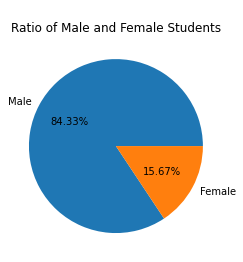

In [461]:
#Plot a pie chart to show the ratio of male and female students
count_total = len(df['Gender'])
count_male = 0
count_female = 0
for i in range(len(df['Gender'])):
    if(df['Gender'][i] == 'Male'):
        count_male += 1
    else:
        count_female += 1
print(f'Total People = {count_total}')
print(f'Males = {count_male}')
print(f'Females = {count_female}')

plt.pie([count_male, count_female], labels = ['Male', 'Female'], autopct='%1.2f%%')
plt.title('\nRatio of Male and Female Students')
plt.show()

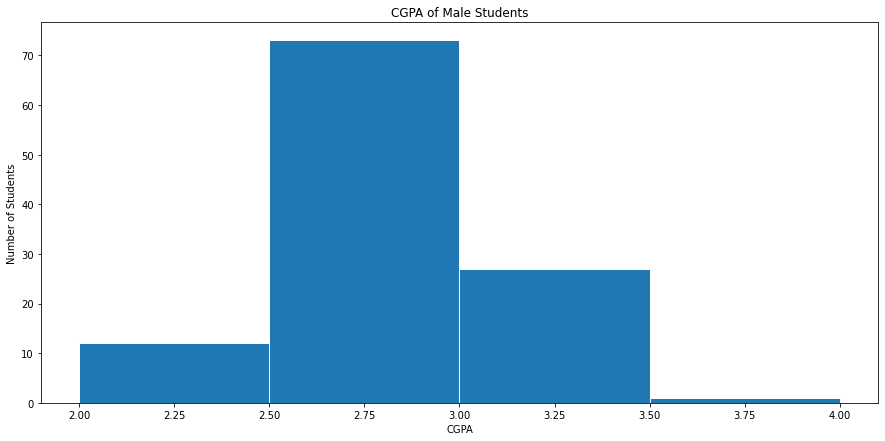

In [462]:
#Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0
male_cgpa = []
for i in range(len(df['CGPA'])):
    if (df['Gender'][i] == 'Male'):
        cgpa = float(df['CGPA'][i])
        male_cgpa.append(cgpa)

plt.figure(figsize=(15,7))
plt.hist(male_cgpa, edgecolor='white', bins=[2.0, 2.5, 3.0, 3.5, 4.0])
plt.title('CGPA of Male Students')
plt.xlabel('CGPA')
plt.ylabel('Number of Students')
plt.show()

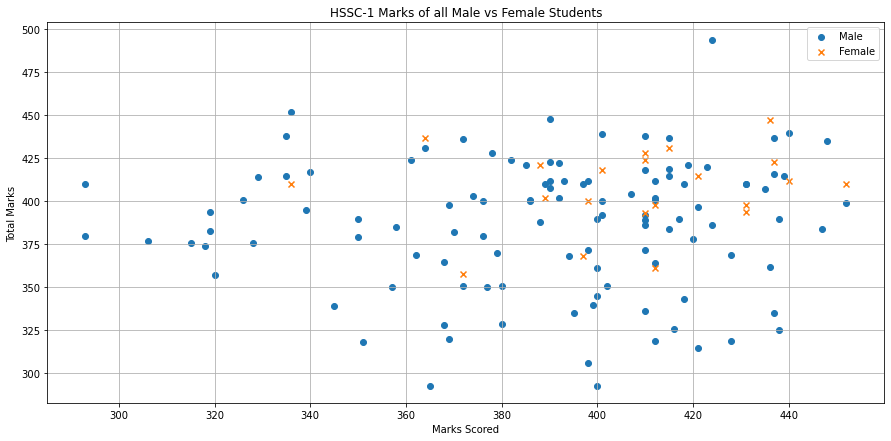

In [463]:
#Plot the HSSC-1 marks of all male vs female students on a scatter plot.
male_marks = []
female_marks = []
grades_range = []

for i in range(len(df['HSSC-1'])):
    if(int(df['HSSC-1'][i]) <= 510):
        marks = int(df['HSSC-1'][i])
        
    if(df['Gender'][i] == 'Male'):
        male_marks.append(marks)
    else:
        female_marks.append(marks)

for i in range(len(df['HSSC-1'])):
    if(int(df['HSSC-1'][i]) <= 510):
        marks = int(df['HSSC-1'][i])
    grades_range.append(marks)

i = 0
range_diff = len(df['HSSC-1']) - len(male_marks)
while (i < range_diff):
    male_marks.append('NaN')
    i += 1

i = 0
range_diff = len(df['HSSC-1']) - len(female_marks)
while (i < range_diff):
    female_marks.append('NaN')
    i += 1

plt.figure(figsize=(15,7))    
plt.scatter(grades_range, male_marks, marker='o')
plt.scatter(grades_range,female_marks, marker='x')
plt.title('HSSC-1 Marks of all Male vs Female Students')
plt.xlabel('Marks Scored')
plt.ylabel('Total Marks')
plt.grid(True)
plt.legend(["Male" , "Female"])
plt.show()

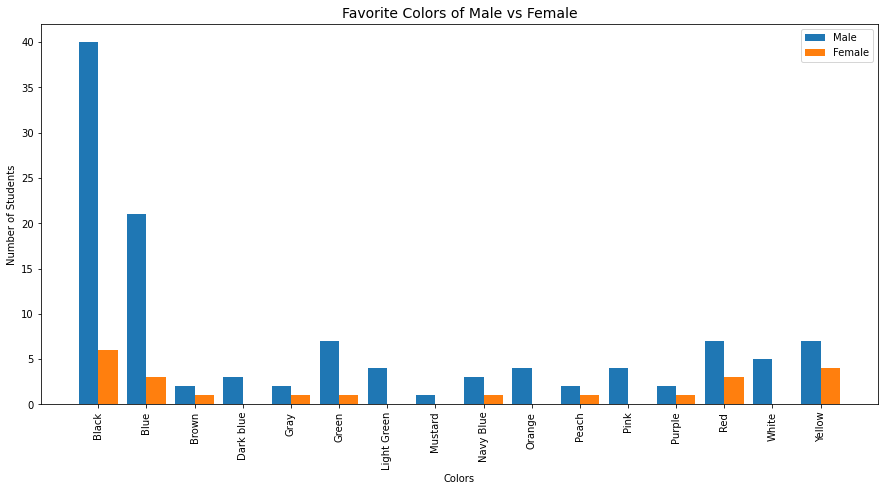

In [471]:
# Plot the favorite colors of male vs female students on a bar chart.
all_colors = []

for i in range(len(df['FavoriteColor'])):
    color = df['FavoriteColor'][i].strip()
    if 'and' in color:
        color1, color2 = color.split('and')
        all_colors.append(color1.strip())
        all_colors.append(color2.strip())
    else:
        all_colors.append(color)


all_colors = np.unique(all_colors)
jsonObj = {"Color":all_colors}
colors = pd.DataFrame(jsonObj)

male = []
female = []
for i in colors['Color']:
    freq_male = 0
    freq_female = 0
    for color, gender in zip(df['FavoriteColor'], df['Gender']):
            color = color.strip()
            gender = gender.strip()
            if 'and' in color:
                color1, color2 = color.split('and')
                if i == color1.strip():
                    if(gender == "Male"):
                        freq_male += 1
                    else:
                        freq_female += 1
                
                if i == color2.strip():
                    if(gender == "Male"):
                        freq_male += 1
                    else:
                        freq_female += 1
            
            else:
                if i == color:
                    if(gender == "Male"):
                        freq_male += 1
                    else:
                        freq_female += 1
    male.append(freq_male)
    female.append(freq_female)
    
X_axis = np.arange(len(all_colors))

plt.figure(figsize=(15,7))
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')

plt.xticks(X_axis, all_colors, rotation='vertical')
plt.title("Favorite Colors of Male vs Female", fontsize = 14)
plt.xlabel("Colors")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

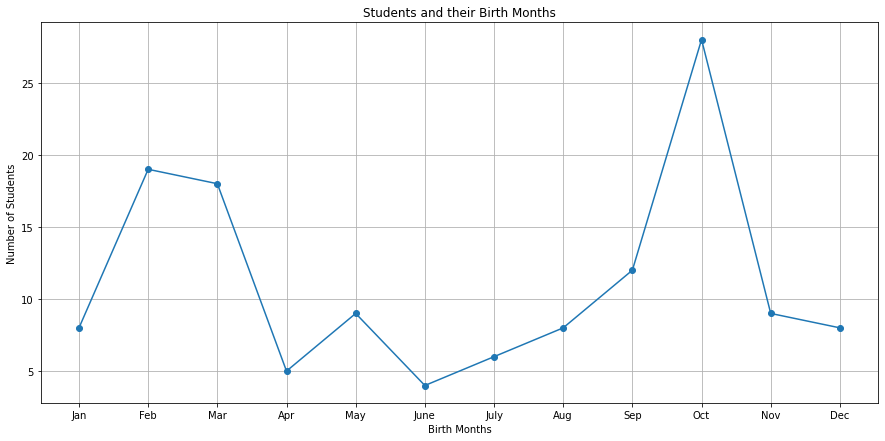

In [391]:
#Plot line chart of students and their birth months.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0]
for i in range(len(df['BirthMonth'])):
    month = df['BirthMonth'][i]
    for j in range(len(months)):
        if month == months[j]:
            months_freq[j] += 1

x = np.arange(start = 1, stop = 13, step = 1)
line_xticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(15,7))
plt.xticks(x, line_xticks)
plt.plot(x, months_freq, marker = 'o')
plt.title("Students and their Birth Months")
plt.xlabel("Birth Months")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

Correlation matrix between HSSC-1 and HSSC-2 marks: 
          HSSC-1    HSSC-2
HSSC-1  1.000000  0.144829
HSSC-2  0.144829  1.000000


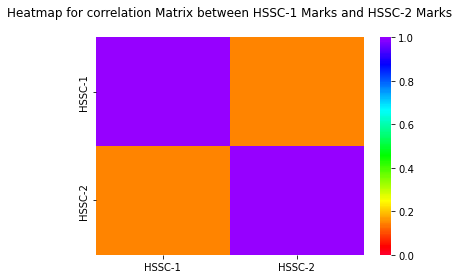

In [410]:
#Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.
hssc_1 = []
hssc_2 = []
for i in range(len(df['HSSC-1'])):
    if( int(df['HSSC-1'][i]) <= 510 ):
        marks1 = int(df['HSSC-1'][i])
        hssc_1.append(marks1)
        marks2 = int(df['HSSC-2'][i])
        hssc_2.append(marks2)

data = {
    'HSSC-1': np.array(hssc_1),
    'HSSC-2':  np.array(hssc_2)
}

dataframe = pd.DataFrame(data, columns=['HSSC-1', 'HSSC-2'])

corr_matrix = dataframe.corr()
print("Correlation matrix between HSSC-1 and HSSC-2 marks: ")
print(corr_matrix)

plt.title('Heatmap for correlation Matrix between HSSC-1 Marks and HSSC-2 Marks\n')
sns.heatmap(corr_matrix, vmin=0, vmax=1, center=0.57, cmap = 'gist_rainbow')
plt.show()